In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Load the dataset
data = pd.read_csv('finance_data.csv')
data

,Identifier,Date,Time,Open,High,Low,Close,Volume,Extra
0,BANKNIFTY,2016/01/01,09:17,16912.60,16913.80,16899.00,16908.40,42,NaN
1,BANKNIFTY_F1,2016/01/01,09:17,16938.00,16940.00,16925.90,16934.80,13050,NaN
2,INDIAVIX,2016/01/01,09:17,13.95,14.04,13.93,14.00,37,NaN
3,NIFTY,2016/01/01,09:17,7928.65,7929.65,7926.30,7926.45,43200,NaN
4,NIFTY_F1,2016/01/01,09:17,7938.00,7938.10,7932.55,7933.25,43200,NaN
...,...,...,...,...,...,...,...,...,...
2319690,BANKNIFTY,2020/12/31,15:32,31264.10,31264.10,31264.10,31264.10,0,0.0
2319691,NIFTY,2020/12/31,15:32,13981.80,13981.80,13981.80,13981.80,0,0.0
2319692,INDIAVIX,2020/12/31,15:33,21.09,21.09,21.09,21.09,0,0.0
2319693,BANKNIFTY_F1,2020/12/31,18:49,31264.10,31264.10,31264.10,31264.10,1,0.0


In [3]:
df =data.drop("Extra", axis =1)
# Display the first few rows of the dataset
df.head()


,Identifier,Date,Time,Open,High,Low,Close,Volume
0,BANKNIFTY,2016/01/01,09:17,16912.60,16913.80,16899.00,16908.40,42
1,BANKNIFTY_F1,2016/01/01,09:17,16938.00,16940.00,16925.90,16934.80,13050
2,INDIAVIX,2016/01/01,09:17,13.95,14.04,13.93,14.00,37
3,NIFTY,2016/01/01,09:17,7928.65,7929.65,7926.30,7926.45,43200
4,NIFTY_F1,2016/01/01,09:17,7938.00,7938.10,7932.55,7933.25,43200


In [4]:
len(df)

2319695

In [5]:
from datetime import datetime
df['created_at'] = df[['Date', 'Time']].apply(lambda x: datetime.strptime(f"{x[0]} {x[1]}", "%Y/%m/%d %H:%M"), axis=1)
df['day'] = pd.DatetimeIndex(df['created_at']).day
df['month'] = pd.DatetimeIndex(df['created_at']).month
df['year'] = pd.DatetimeIndex(df['created_at']).year

In [6]:
df.head()

,Identifier,Date,Time,Open,High,Low,Close,Volume,created_at,day,month,year
0,BANKNIFTY,2016/01/01,09:17,16912.60,16913.80,16899.00,16908.40,42,2016-01-01 09:17:00,1,1,2016
1,BANKNIFTY_F1,2016/01/01,09:17,16938.00,16940.00,16925.90,16934.80,13050,2016-01-01 09:17:00,1,1,2016
2,INDIAVIX,2016/01/01,09:17,13.95,14.04,13.93,14.00,37,2016-01-01 09:17:00,1,1,2016
3,NIFTY,2016/01/01,09:17,7928.65,7929.65,7926.30,7926.45,43200,2016-01-01 09:17:00,1,1,2016
4,NIFTY_F1,2016/01/01,09:17,7938.00,7938.10,7932.55,7933.25,43200,2016-01-01 09:17:00,1,1,2016


In [7]:
df= df.drop("Date",axis=1)
df.head()

,Identifier,Time,Open,High,Low,Close,Volume,created_at,day,month,year
0,BANKNIFTY,09:17,16912.60,16913.80,16899.00,16908.40,42,2016-01-01 09:17:00,1,1,2016
1,BANKNIFTY_F1,09:17,16938.00,16940.00,16925.90,16934.80,13050,2016-01-01 09:17:00,1,1,2016
2,INDIAVIX,09:17,13.95,14.04,13.93,14.00,37,2016-01-01 09:17:00,1,1,2016
3,NIFTY,09:17,7928.65,7929.65,7926.30,7926.45,43200,2016-01-01 09:17:00,1,1,2016
4,NIFTY_F1,09:17,7938.00,7938.10,7932.55,7933.25,43200,2016-01-01 09:17:00,1,1,2016


In [8]:
# Summary statistics
summary = df.describe()

summary

,Open,High,Low,Close,Volume,day,month,year
count,2.319695e+06,2.319695e+06,2.319695e+06,2.319695e+06,2.319695e+06,2.319695e+06,2.319695e+06,2.319695e+06
mean,1.374949e+04,1.375366e+04,1.374532e+04,1.374947e+04,8.809004e+03,1.578527e+01,6.495172e+00,2.018008e+03
std,9.763408e+03,9.766586e+03,9.760215e+03,9.763395e+03,2.222699e+04,8.798912e+00,3.454366e+00,1.417151e+00
min,2.300000e+00,1.005750e+01,2.300000e+00,9.867500e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.016000e+03
25%,8.226750e+03,8.228800e+03,8.224950e+03,8.226650e+03,0.000000e+00,8.000000e+00,3.000000e+00,2.017000e+03
50%,1.132000e+04,1.132280e+04,1.131770e+04,1.132000e+04,5.700000e+01,1.600000e+01,7.000000e+00,2.018000e+03
75%,2.280990e+04,2.281630e+04,2.280320e+04,2.280990e+04,8.840000e+03,2.300000e+01,9.000000e+00,2.019000e+03
max,3.276860e+04,3.277390e+04,3.275610e+04,3.276880e+04,1.664025e+06,3.100000e+01,1.200000e+01,2.020000e+03


In [8]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

Identifier    0
Time          0
Open          0
High          0
Low           0
Close         0
Volume        0
created_at    0
day           0
month         0
year          0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2319695 entries, 0 to 2319694
Data columns (total 11 columns):
 #   Column      Dtype         
---  ------      -----         
 0   Identifier  object        
 1   Time        object        
 2   Open        float64       
 3   High        float64       
 4   Low         float64       
 5   Close       float64       
 6   Volume      int64         
 7   created_at  datetime64[ns]
 8   day         int64         
 9   month       int64         
 10  year        int64         
dtypes: datetime64[ns](1), float64(4), int64(4), object(2)
memory usage: 194.7+ MB


In [10]:
df.head(5)

,Identifier,Time,Open,High,Low,Close,Volume,created_at,day,month,year
0,BANKNIFTY,09:17,16912.60,16913.80,16899.00,16908.40,42,2016-01-01 09:17:00,1,1,2016
1,BANKNIFTY_F1,09:17,16938.00,16940.00,16925.90,16934.80,13050,2016-01-01 09:17:00,1,1,2016
2,INDIAVIX,09:17,13.95,14.04,13.93,14.00,37,2016-01-01 09:17:00,1,1,2016
3,NIFTY,09:17,7928.65,7929.65,7926.30,7926.45,43200,2016-01-01 09:17:00,1,1,2016
4,NIFTY_F1,09:17,7938.00,7938.10,7932.55,7933.25,43200,2016-01-01 09:17:00,1,1,2016


In [15]:
Identifier = pd.get_dummies(df['Identifier'], drop_first = True)
Identifier



,BANKNIFTY_F1,INDIAVIX,NIFTY,NIFTY_F1
0,0,0,0,0
1,1,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,1
...,...,...,...,...
2319690,0,0,0,0
2319691,0,0,1,0
2319692,0,1,0,0
2319693,1,0,0,0


In [16]:
df = pd.concat([df,Identifier],axis=1)
df.head()

,Identifier,Time,Open,High,Low,Close,Volume,created_at,day,month,year,BANKNIFTY_F1,INDIAVIX,NIFTY,NIFTY_F1
0,BANKNIFTY,09:17,16912.60,16913.80,16899.00,16908.40,42,2016-01-01 09:17:00,1,1,2016,0,0,0,0
1,BANKNIFTY_F1,09:17,16938.00,16940.00,16925.90,16934.80,13050,2016-01-01 09:17:00,1,1,2016,1,0,0,0
2,INDIAVIX,09:17,13.95,14.04,13.93,14.00,37,2016-01-01 09:17:00,1,1,2016,0,1,0,0
3,NIFTY,09:17,7928.65,7929.65,7926.30,7926.45,43200,2016-01-01 09:17:00,1,1,2016,0,0,1,0
4,NIFTY_F1,09:17,7938.00,7938.10,7932.55,7933.25,43200,2016-01-01 09:17:00,1,1,2016,0,0,0,1


In [17]:
from sklearn.model_selection import train_test_split

# Features and target
x = df[['Open', 'Volume','day','month','year','BANKNIFTY_F1','INDIAVIX','NIFTY','NIFTY_F1']]
y = df[['Close','High', 'Low']]

In [18]:
y

,Close,High,Low
0,16908.40,16913.80,16899.00
1,16934.80,16940.00,16925.90
2,14.00,14.04,13.93
3,7926.45,7929.65,7926.30
4,7933.25,7938.10,7932.55
...,...,...,...
2319690,31264.10,31264.10,31264.10
2319691,13981.80,13981.80,13981.80
2319692,21.09,21.09,21.09
2319693,31264.10,31264.10,31264.10


In [19]:
# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

X_train.shape

(1855756, 9)

In [20]:
X_train

,Open,Volume,day,month,year,BANKNIFTY_F1,INDIAVIX,NIFTY,NIFTY_F1
1922321,30418.90,25480,25,2,2020,1,0,0,0
1602568,30628.00,10960,19,6,2019,1,0,0,0
360461,18993.10,0,14,10,2016,0,0,0,0
1960171,19909.10,0,26,3,2020,0,0,0,0
457085,17938.70,14400,28,12,2016,1,0,0,0
...,...,...,...,...,...,...,...,...,...
732180,10115.80,1950,1,8,2017,0,0,0,1
110268,7633.95,146700,29,3,2016,0,0,1,0
1692743,16.06,0,28,8,2019,0,1,0,0
2229084,11895.70,0,22,10,2020,0,0,1,0


In [20]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)


LinearRegression()

In [21]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions using the test data
y_pred = model.predict(X_test)

y_pred

array([[3.25625532e+04, 3.25704602e+04, 3.25546416e+04],
       [1.62124814e+01, 1.75862122e+01, 1.48177980e+01],
       [1.94669596e+04, 1.94734891e+04, 1.94604306e+04],
       ...,
       [2.52934272e+04, 2.53014143e+04, 2.52854944e+04],
       [7.56154560e+03, 7.56409906e+03, 7.55909187e+03],
       [2.90272742e+04, 2.90361275e+04, 2.90184206e+04]])

In [22]:
y_test

,Close,High,Low
1845338,32562.00,32565.00,32549.90
1728678,16.20,16.23,16.08
398315,19477.80,19478.30,19458.90
1441405,27421.30,27431.30,27416.00
410237,8030.50,8030.70,8025.55
...,...,...,...
911158,25676.70,25677.30,25671.10
1389860,10875.30,10876.70,10873.80
1265314,25285.30,25296.10,25284.90
40193,7558.85,7561.95,7557.25


In [23]:
x.columns

Index(['Open', 'Volume', 'day', 'month', 'year', 'BANKNIFTY_F1', 'INDIAVIX',
       'NIFTY', 'NIFTY_F1'],
      dtype='object')

The mean squared error (MSE) of our model on the test data is approximately 109.86, and the coefficient of determination (R² score) is approximately 0.978. This means that about 97.8% of the variance in the Yearly Amount Spent can be explained by our model, which is a pretty good result.

Finally, let's take a look at the coefficients of our model to see which features are most influential in predicting the Yearly Amount Spent.

In [27]:
x.head(5)

,Open,Volume,day,month,year,BANKNIFTY_F1,INDIAVIX,NIFTY,NIFTY_F1
0,16912.60,42,1,1,2016,0,0,0,0
1,16938.00,13050,1,1,2016,1,0,0,0
2,13.95,37,1,1,2016,0,1,0,0
3,7928.65,43200,1,1,2016,0,0,1,0
4,7938.00,43200,1,1,2016,0,0,0,1


In [31]:
#[['Open', 'Volume','day','month','year','BANKNIFTY_F1','INDIAVIX','NIFTY','NIFTY_F1']]
#[['Close','High', 'Low']]
new_value = model.predict([[22462,400,2,4,2024,0,0,1,0]])

C:\Users\chsri\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [32]:
today = model.predict(new_value)

C:\Users\chsri\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: X has 3 features, but LinearRegression is expecting 9 features as input.

In [33]:
y_pred

array([[3.25625532e+04, 3.25704602e+04, 3.25546416e+04],
       [1.62124814e+01, 1.75862122e+01, 1.48177980e+01],
       [1.94669596e+04, 1.94734891e+04, 1.94604306e+04],
       ...,
       [2.52934272e+04, 2.53014143e+04, 2.52854944e+04],
       [7.56154560e+03, 7.56409906e+03, 7.55909187e+03],
       [2.90272742e+04, 2.90361275e+04, 2.90184206e+04]])

In [35]:
y_test

,Close,High,Low
1845338,32562.00,32565.00,32549.90
1728678,16.20,16.23,16.08
398315,19477.80,19478.30,19458.90
1441405,27421.30,27431.30,27416.00
410237,8030.50,8030.70,8025.55
...,...,...,...
911158,25676.70,25677.30,25671.10
1389860,10875.30,10876.70,10873.80
1265314,25285.30,25296.10,25284.90
40193,7558.85,7561.95,7557.25


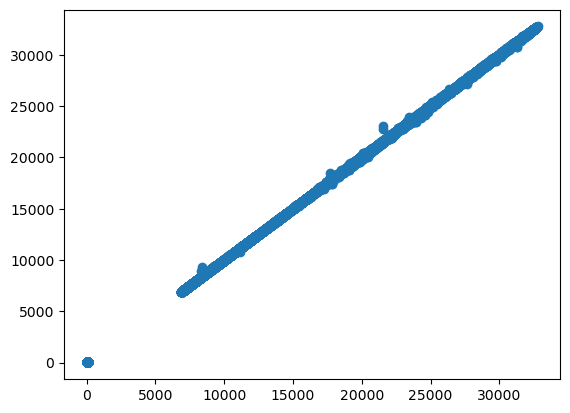

In [36]:
plt.scatter(y_pred,y_test)

In [37]:
y.head()

,Close,High,Low
0,16908.40,16913.80,16899.00
1,16934.80,16940.00,16925.90
2,14.00,14.04,13.93
3,7926.45,7929.65,7926.30
4,7933.25,7938.10,7932.55


In [38]:
y_pred

array([[3.25625532e+04, 3.25704602e+04, 3.25546416e+04],
       [1.62124814e+01, 1.75862122e+01, 1.48177980e+01],
       [1.94669596e+04, 1.94734891e+04, 1.94604306e+04],
       ...,
       [2.52934272e+04, 2.53014143e+04, 2.52854944e+04],
       [7.56154560e+03, 7.56409906e+03, 7.55909187e+03],
       [2.90272742e+04, 2.90361275e+04, 2.90184206e+04]])

In [39]:
X_test

,Open,Volume,day,month,year,BANKNIFTY_F1,INDIAVIX,NIFTY,NIFTY_F1
1845338,32562.60,6940,30,12,2019,1,0,0,0
1728678,16.19,0,26,9,2019,0,1,0,0
398315,19466.90,6560,15,11,2016,1,0,0,0
1441405,27423.60,0,8,2,2019,0,0,0,0
410237,8026.85,0,23,11,2016,0,0,1,0
...,...,...,...,...,...,...,...,...,...
911158,25673.60,1960,19,12,2017,1,0,0,0
1389860,10876.50,0,2,1,2019,0,0,1,0
1265314,25293.50,58,24,9,2018,0,0,0,0
40193,7561.65,41025,2,2,2016,0,0,1,0


In [40]:
from joblib import Parallel, delayed 
import joblib 
# Save the model as a pickle in a file 
joblib.dump(model, 'finance.pkl') 
  
# Load the model from the file 
knn_from_joblib = joblib.load('finance.pkl') 
  
# Use the loaded model to make predictions 
knn_from_joblib.predict(X_test) 


array([[3.25625532e+04, 3.25704602e+04, 3.25546416e+04],
       [1.62124814e+01, 1.75862122e+01, 1.48177980e+01],
       [1.94669596e+04, 1.94734891e+04, 1.94604306e+04],
       ...,
       [2.52934272e+04, 2.53014143e+04, 2.52854944e+04],
       [7.56154560e+03, 7.56409906e+03, 7.55909187e+03],
       [2.90272742e+04, 2.90361275e+04, 2.90184206e+04]])

In [41]:
y_test.head(3)

,Close,High,Low
1845338,32562.0,32565.00,32549.90
1728678,16.2,16.23,16.08
398315,19477.8,19478.30,19458.90


In [42]:
X_test.head()

,Open,Volume,day,month,year,BANKNIFTY_F1,INDIAVIX,NIFTY,NIFTY_F1
1845338,32562.60,6940,30,12,2019,1,0,0,0
1728678,16.19,0,26,9,2019,0,1,0,0
398315,19466.90,6560,15,11,2016,1,0,0,0
1441405,27423.60,0,8,2,2019,0,0,0,0
410237,8026.85,0,23,11,2016,0,0,1,0


In [44]:
import pandas as pd

In [45]:
def predict(output_features):
    df = pd.DataFrame([output_features], columns=[
        "Open", "Volume", "day", "month", "year",
        "BANKNIFTY_F1", "INDIAVIX", "NIFTY", "NIFTY_F1"
    ])
    prediction = model.predict(df)
    return prediction

In [46]:
predict([19466,6560,15,11,2016,1,0,0,0])

array([[19466.05957053, 19472.58928128, 19459.53042998]])